In [31]:
import pandas as pd
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

- Comment sont réparties les données? Quels sont les attributs de ce jeu de données?

On a 9 attributs pour ce jeu de données : (calories, sodium, calcium, lipides, retinol, folates, proteines,
cholesterol et magnesium)et on a 29 échantillons .

array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='calcium', ylabel='calories'>,
        <AxesSubplot:xlabel='lipides', ylabel='calories'>,
        <AxesSubplot:xlabel='retinol', ylabel='calories'>,
        <AxesSubplot:xlabel='folates', ylabel='calories'>,
        <AxesSubplot:xlabel='proteines', ylabel='calories'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='calories'>,
        <AxesSubplot:xlabel='magnesium', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='calcium', ylabel='sodium'>,
        <AxesSubplot:xlabel='lipides', ylabel='sodium'>,
        <AxesSubplot:xlabel='retinol', ylabel='sodium'>,
        <AxesSubplot:xlabel='folates', ylabel='sodium'>,
        <AxesSubplot:xlabel='proteines', ylabel='sodium'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='sodium'>

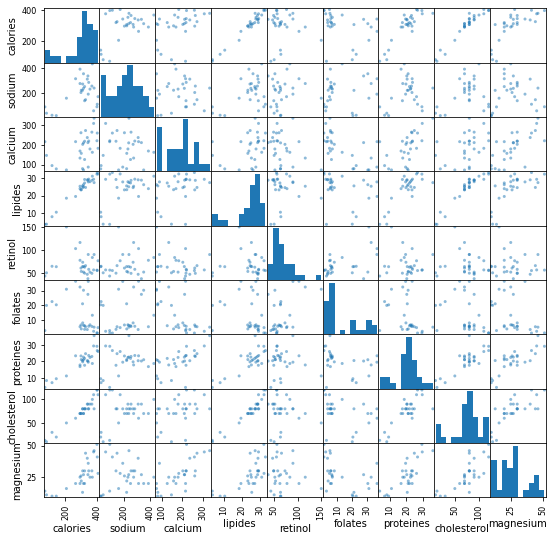

In [32]:
#croisement 2 à 2 des variables
pd.plotting.scatter_matrix(fromage, figsize=(9,9))

On peut déduire que pour certains couples on trouve une relation de correlation linéaire comme par exemple :
calories et cholesterol , calories et lipides , lipides et cholesterol

## Clustering :

In [33]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)

print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage.iloc[idk]))
print("centers",kmeans.cluster_centers_)

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [ 44.67517687 176.06769384 309.5039923   98.83002277]
 [ 66.39975258 145.61200264 273.9400961  103.74546448]
 [ 72.0404549  182.80599775 298.65300308 170.2611917 ]
 [ 57.86280572 204.98823213 311.48990553 105.53037193]
 [ 39.94716153 204.4018782  285.29211565 155.61953412]
 [144.4193

# Silhouette per number of clusters


[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


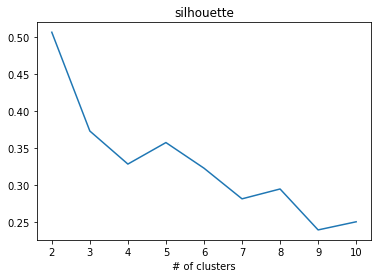

In [34]:

from sklearn import metrics
import matplotlib.pyplot as plt

silhouettes = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(fromage)
    silhouettes[k] = metrics.silhouette_score(fromage,km.labels_)
print (silhouettes)

plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),silhouettes)


On peut choisir entre trois valeurs :3 , 4 et 5

# AHC : Agglomerative Hierarchical Clustering

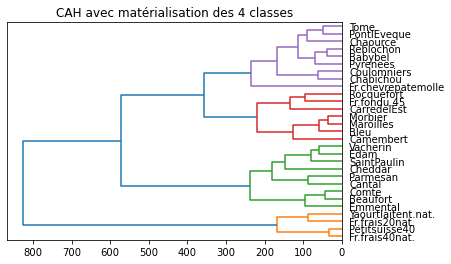

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [35]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

Cette méthode divise la dataset à 4 clusters .

# Correspondance between AHC clusters and KMeans clusters

In [36]:
pandas.crosstab(kmeans.labels_,groupes_cah)

col_0,1,2,3,4
row_0,,,,
0,0,0,1,6
1,0,8,0,0
2,4,0,0,0
3,0,1,6,3


kmeans.labels_ varying from 0 to 3 
ahc_groups varying from 1 to 4
clusters correspondance KMeans->AHC:
0 -> 4 
1 -> 2 
2 -> 1 
3 -> 3

# Analyse en composantes principales (ACP)

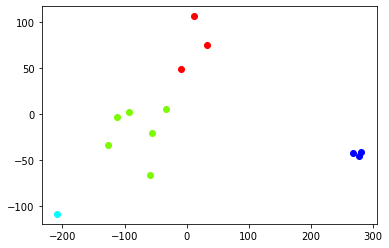

In [37]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

# CAH de sklearn.cluster:

In [38]:
from sklearn.cluster import AgglomerativeClustering
cah =AgglomerativeClustering(n_clusters=4)
cah.fit(fromage)
idk = np.argsort(cah.labels_)
print(pd.DataFrame(fromage.index[idk],cah.labels_[idk]))

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [39]:
# Evidemment le meme résulat que CAH de scipy
pd.crosstab(groupes_cah, cah.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,0,4
2,9,0,0,0
3,0,7,0,0
4,0,0,9,0


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
n_clusters = 5
km = KMeans(n_clusters = 2)
A=np.array(fromage)
clusters=  [A]
max_distance = 0
max_idx=0
while (len(clusters) < n_clusters):
    A=clusters[max_idx]
    clusters.pop(max_idx)

    km.fit(A)
    B_indices = np.where(km.labels_ ==0)[0]
    C_indices = np.where(km.labels_ ==1)[0]
    B=A[B_indices]
    C=A[C_indices]

    clusters.append(B)
    clusters.append(C)
    max_distance = 0
    max_idx=0
    for idx , c in enumerate(clusters):
        intra_cluster_mean_distance = pairwise_distances(c, metric="euclidean").mean()
        if intra_cluster_mean_distance> max_distance:
            max_distance = intra_cluster_mean_distance
            max_idx = idx
  
print(clusters)

[array([[401. , 112. , 259.4,  33.3,  54.9,   1.2,  26.6, 120. ,  41. ],
       [367. , 256. , 264. ,  28.8,  48.8,   5.7,  23. ,  90. ,  30. ],
       [406. , 172. , 182.3,  32.5,  76.4,   4.9,  26. , 110. ,  28. ],
       [399. ,  92. , 220.5,  32.4,  55.9,   1.3,  29.2, 120. ,  51. ],
       [327. , 148. , 272.2,  24.7,  65.7,   5.5,  24.7,  80. ,  44. ],
       [378. ,  60. , 308.2,  29.4,  56.3,   2.4,  29.4, 110. ,  45. ],
       [381. , 240. , 334.6,  27.5,  90. ,   5.2,  35.7,  80. ,  46. ],
       [298. , 205. , 261. ,  23.3,  60.4,   6.7,  23.3,  70. ,  26. ],
       [321. , 140. , 218. ,  29.3,  49.2,   3.7,  17.6,  80. ,  30. ]]), array([[314. , 238. , 209.8,  25.1,  63.7,   6.4,  22.6,  70. ,  27. ],
       [344. , 192. ,  87.2,  27.9,  90.1,  36.3,  19.5,  80. ,  36. ],
       [292. , 276. , 132.9,  25.4, 116.4,  32.5,  17.8,  70. ,  25. ],
       [308. , 222. ,  79.2,  25.6,  63.6,  21.1,  20.5,  80. ,  13. ],
       [300. , 223. , 156.7,  23.4,  53. ,   4. ,  21.1,  70.

In [43]:
i = 0
for cluster in clusters:
    print("cluster ", i)
    print(pd.merge(pd.DataFrame(cluster, columns=fromage.columns), fromage.reset_index(),  how='left')['Fromages'])
    i+=1

cluster  0
0       Beaufort
1         Cantal
2        Cheddar
3          Comte
4           Edam
5       Emmental
6       Parmesan
7    SaintPaulin
8       Vacherin
Name: Fromages, dtype: object
cluster  1
0        Babybel
1      Chabichou
2       Chaource
3    Coulomniers
4    PontlEveque
5       Pyrenees
6           Tome
Name: Fromages, dtype: object
cluster  2
0    CarredelEst
1           Bleu
2      Camembert
3    Fr.fondu.45
4      Maroilles
5        Morbier
6      Reblochon
7     Rocquefort
Name: Fromages, dtype: object
cluster  3
0    Fr.chevrepatemolle
Name: Fromages, dtype: object
cluster  4
0        Fr.frais20nat.
1        Fr.frais40nat.
2         Petitsuisse40
3    Yaourtlaitent.nat.
Name: Fromages, dtype: object
